In [236]:
import sympy as sym
sym.init_printing()

from sympy import I, Matrix, symbols


In [237]:
A,B,C,D,F,G =sym.symbols('A B C D F G')
_in,a_out,b_in,b_out=sym.symbols('a_in a_out b_in b_out')

Sb12,Sa12=sym.symbols('S_b_1_2 S_a_1_2')
Sb13,Sa13=sym.symbols('S_b_1_3 S_a_1_3')
w, wcm,wco=sym.symbols('omega omega_c_mu omega_c_o',Real=True) 
gammi,gammc,gamoi,gamoc=sym.symbols('gamma_mu_i gamma_mu_c gamma_o_i gamma_o_c',positive = True, Real=True)


In [238]:

in_mat=Matrix([[A,-C],[G,-D]])
out_mat=Matrix([[-B,C],[-G,F]])

In [239]:
in_mat, out_mat

⎛⎡A  -C⎤  ⎡-B  C⎤⎞
⎜⎢     ⎥, ⎢     ⎥⎟
⎝⎣G  -D⎦  ⎣-G  F⎦⎠

In [240]:
out_mat.inv()*in_mat

⎡   A⋅F          C⋅G         C⋅D          C⋅F    ⎤
⎢────────── - ──────────  ────────── - ──────────⎥
⎢-B⋅F + C⋅G   -B⋅F + C⋅G  -B⋅F + C⋅G   -B⋅F + C⋅G⎥
⎢                                                ⎥
⎢   A⋅G          B⋅G         B⋅D          C⋅G    ⎥
⎢────────── - ──────────  ────────── - ──────────⎥
⎣-B⋅F + C⋅G   -B⋅F + C⋅G  -B⋅F + C⋅G   -B⋅F + C⋅G⎦

In [241]:
A_eq=(I*(wcm+Sb12-w)+(gammi-gammc)/2)
B_eq=(I*(wcm+Sb12-w)+(gammi+gammc)/2)
C_eq=-I*Sa12*sym.sqrt(gammc/gamoc)
D_eq=(I*(wco+Sb13-w)+(gamoi-gamoc)/2)
F_eq=(I*(wco+Sb13-w)+(gamoi+gamoc)/2)
G_eq=-I*Sa13*sym.sqrt(gamoc/gammc)


In [242]:
sym.simplify((out_mat.inv()*in_mat).subs({A:A_eq,B:B_eq,C:C_eq,D:D_eq,F:F_eq,G:G_eq}))*Matrix([[b_in],[a_in]])

⎡                                                      _______   _______      
⎢                                     4⋅ⅈ⋅Sₐ ₁ ₂⋅aᵢₙ⋅╲╱ γ_μ_c ⋅╲╱ γ_o_c       
⎢- ───────────────────────────────────────────────────────────────────────────
⎢  4⋅Sₐ ₁ ₂⋅Sₐ ₁ ₃ + (γ_μ_c + γₘᵤ ᵢ + 2⋅ⅈ⋅(S_b_1_2 - ω + ω_c_μ))⋅(γ_o_c + γₒ ᵢ
⎢                                                                             
⎢                                                      _______   _______      
⎢                                     4⋅ⅈ⋅Sₐ ₁ ₃⋅bᵢₙ⋅╲╱ γ_μ_c ⋅╲╱ γ_o_c       
⎢- ───────────────────────────────────────────────────────────────────────────
⎣  4⋅Sₐ ₁ ₂⋅Sₐ ₁ ₃ + (γ_μ_c + γₘᵤ ᵢ + 2⋅ⅈ⋅(S_b_1_2 - ω + ω_c_μ))⋅(γ_o_c + γₒ ᵢ

                                                                              
                                bᵢₙ⋅(4⋅Sₐ ₁ ₂⋅Sₐ ₁ ₃ + (-γ_μ_c + γₘᵤ ᵢ + 2⋅ⅈ⋅(
───────────────────────────── - ──────────────────────────────────────────────
 + 2⋅ⅈ⋅(S_b_1_3 - ω + ω_c_o))       4⋅Sₐ ₁ ₂⋅Sₐ ₁ ₃

In [243]:
delo,delm, muo, mum, chi, xi, Del,a,b,c=sym.symbols('delta_o delta_mu mu_o mu_mu chi xi Delta a b c', real=True) 
sigo, sigm= sym.symbols('sigma_o sigma_mu', real=True, positive=True)


In [244]:
delosq_eq=2*sigo**2*(chi**2-1/(2*sigm**2)*delm**2)
delm_eq=delo-xi+muo-mum

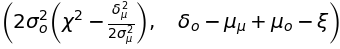

In [245]:
delosq_eq, delm_eq

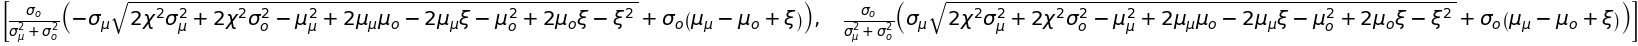

In [246]:
delo1=sym.solve(sym.simplify(delosq_eq.subs({delm:delm_eq})-delo**2),delo)
delo1

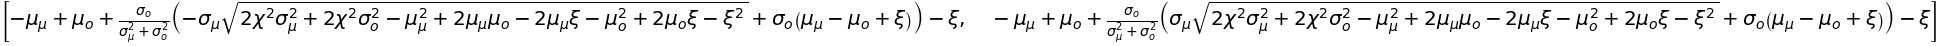

In [247]:
delm1=[(delm_eq.subs({delo:delo1[0]})),(delm_eq.subs({delo:delo1[1]}))]
delm1

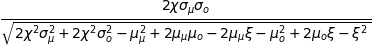

In [248]:
sym.simplify(sym.simplify(sym.simplify(sym.diff(delo1[0],chi))*sym.simplify(sym.diff(delm1[0],xi)))-sym.simplify(sym.simplify(sym.diff(delo1[0],xi))*sym.simplify(sym.diff(delm1[0],chi))))

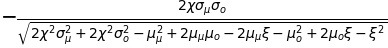

In [249]:
sym.simplify(sym.simplify(sym.simplify(sym.diff(delo1[1],chi))*sym.simplify(sym.diff(delm1[1],xi)))-sym.simplify(sym.simplify(sym.diff(delo1[1],xi))*sym.simplify(sym.diff(delm1[1],chi))))

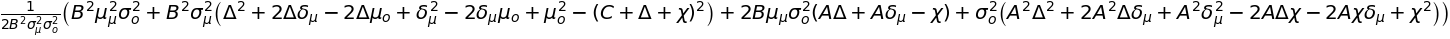

In [250]:
arg1_eq=(delo-muo)**2/(2*sigo**2)+(delm-mum)**2/(2*sigm**2)
Del_eq=delo-delm
chi_eq=A*delo+B*delm

sym.simplify(arg1_eq.subs({delm:(chi-A*delo)/B,delo:Del+delm}).expand()-(Del+chi+C)**2/(2*sigo**2))

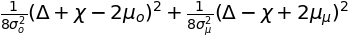

In [251]:
Del_eq=delo-delm
chi_eq=a*delo+b*delm+c
delo_eq=(chi+b*Del-c)/(a+b)
delm_eq=(chi-a*Del-c)/(a+b)
delo_eq=(chi+Del)/(2)
delm_eq=(chi-Del)/(2)
sym.simplify(arg1_eq.subs({delo:delo_eq,delm:delm_eq}))

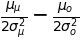

In [252]:
consts=sym.simplify(arg1_eq.subs({delo:delo_eq,delm:delm_eq}).subs({chi:0})).subs({Del:0})
sym.simplify(sym.simplify(((sym.simplify(arg1_eq.subs({delo:delo_eq,delm:delm_eq}).subs({chi:0})))-consts).expand()/Del).subs({Del:0}))

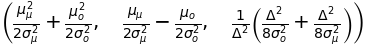

In [253]:
arg2_eq=sym.simplify(arg1_eq.subs({delo:delo_eq,delm:delm_eq}))
arg3_eq=arg2_eq.subs({chi:0})
L1=sym.simplify(arg3_eq.subs({Del:0}))
L2=sym.simplify(sym.simplify(sym.expand((arg3_eq-L1))/Del).subs({Del:0}))
L3=sym.simplify(arg3_eq-L1-L2*Del)/Del**2

L1,L2,L3

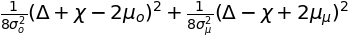

In [254]:
arg2_eq

In [255]:
Q=sym.simplify(1/sym.sqrt(L3))
P=sym.simplify(L2/2*Q**2)

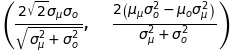

In [256]:
Q, P

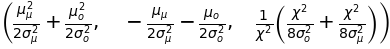

In [257]:
arg4_eq=arg2_eq.subs({Del:0})
K1=sym.simplify(arg4_eq.subs({chi:0}))
K2=sym.simplify(sym.simplify(sym.expand((arg4_eq-K1))/chi).subs({chi:0}))
K3=sym.simplify(arg4_eq-K1-K2*chi)/chi**2
K1,K2,K3

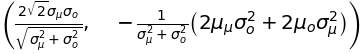

In [258]:
M=sym.simplify(1/sym.sqrt(K3))
N=sym.simplify(K2/2*M**2)
M,N

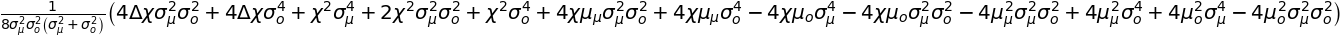

In [259]:
sym.simplify(sym.expand(((chi+N)**2/M**2+(Del+chi+P)**2/Q**2)-arg2_eq))

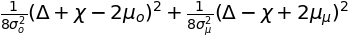

In [260]:
arg2_eq

In [262]:
chi_eq, Del_eq, delo_eq, delm_eq

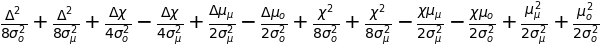

In [275]:
sym.expand(arg1_eq.subs({delo:delo_eq, delm:delm_eq}))


In [268]:
a,b,f = sym.symbols('a b f', real=True, positive=True)
chi, Del, g, c =sym.symbols('chi Delta g c', real=True)

In [269]:
sym.expand((a*Del+b*chi+c)**2)

In [279]:
sym.expand((f*chi-g)**2+(a*Del+b*chi-c)**2)

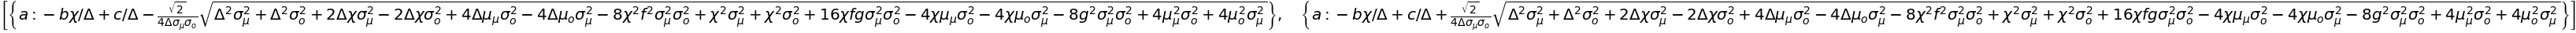

In [278]:
sym.solve(solve_eq,(a,b,c,g,f))

In [311]:

a_sol=sym.solve(sym.Eq(a**2,(1/sigo**2+1/sigm**2)/8), a)
solve_eqs1=[a**2, 2*a*b, -2*a*c,b**2+f**2, -2*b*c-2*f*g]#,c**2+g**2]
solve_eqs2=[(1/sigo**2+1/sigm**2)/8,(1/sigo**2-1/sigm**2)/4, (mum/sigm**2-muo/sigo**2)/2, (1/sigo**2+1/sigm**2)/8, (-mum/sigm**2-muo/sigo**2)/2]#, (mum/sigm**2+muo/sigo**2)/2]
solve_eq_tot=[a_i - b_i for a_i, b_i in zip(solve_eqs1,solve_eqs2)]
solve_ans=sym.solve(solve_eq_tot,[a,b,c,f,g])

#sym.simplify(sym.solve([(1/sigo**2+1/sigm**2)/8-a**2, (1/sigo**2-1/sigm**2)/2-2*a*b], [a,b]))

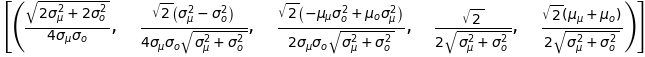

In [312]:
solve_ans

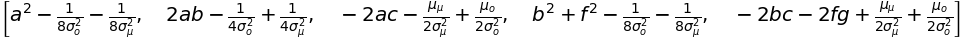

In [313]:
solve_eq_tot

In [319]:
[a_sol,b_sol,c_sol,f_sol,g_sol]=solve_ans[0]

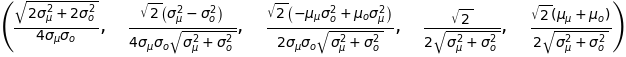

In [320]:
a_sol,b_sol,c_sol,f_sol,g_sol

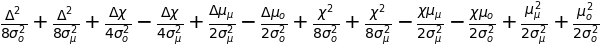

In [321]:
sym.expand(arg1_eq.subs({delo:delo_eq, delm:delm_eq}))


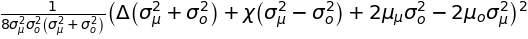

In [330]:

sym.simplify((a_sol*Del+b_sol*chi-c_sol)**2)#+(a_sol*Del+b_sol*chi-c_sol)**2))#-sym.expand(arg1_eq.subs({delo:delo_eq, delm:delm_eq}))

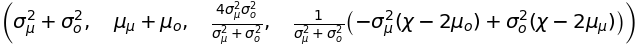

In [378]:
sig_chi_sq=(sigm**2+sigo**2)
mu_chi_eq=(mum+muo)

sig_Del_sq=4*sigo**2*sigm**2/(sigo**2+sigm**2)
mu_Del_eq=1/(sigo**2+sigm**2)*(sigo**2*(chi-2*mum)-sigm**2*(chi-2*muo))
sig_chi_sq, mu_chi_eq, sig_Del_sq, mu_Del_eq

In [338]:
sym.simplify((chi-mu_chi)**2/(2*sig_chi_sq)+(Del-mu_Del)**2/(2*sig_Del_sq)-arg2_eq)

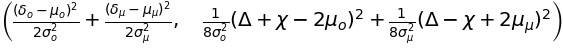

In [363]:
arg1_eq,arg2_eq

In [366]:
delo_eq, delm_eq, delo_eq-delm_eq, delo_eq+delm_eq

In [368]:
sym.simplify(arg1_eq.subs({delo:delo_eq,delm:delm_eq})-arg2_eq)

In [361]:
sym.integrate(sym.exp(-(chi-mu_chi)**2/(2*sig_chi_sq)-(Del-mu_Del)**2/(2*sig_Del_sq)),chi)

KeyboardInterrupt: 

In [339]:
delo_eq, delm_eq

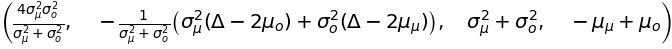

In [369]:
sig_chi_sq, mu_chi, sig_Del_sq, mu_Del

In [392]:
sig_chi, sig_Del=sym.symbols('sigma_chi sigma_Delta', positive=True)
mu_chi, mu_Del=sym.symbols('mu_chi mu_Delta', real=True)
expfun1=1/(2*sym.pi)*1/(sig_chi*sig_Del)*sym.exp(-(Del-mu_Del)**2/(2*sig_Del**2))*sym.exp(-(chi-mu_chi)**2/(2*sig_chi**2))
expfun2=1/(2*sym.pi)*1/(sigo*sigm)*sym.exp(-(delo-sigo)**2/(2*sigo**2))*sym.exp(-(delm-sigm)**2/(2*sigm**2))

In [393]:
mu_chi

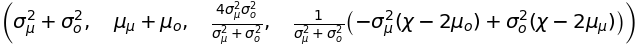

In [395]:
sig_chi_sq, mu_chi_eq, sig_Del_sq, mu_Del_eq

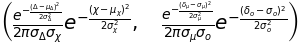

In [394]:

expfun1, expfun2

In [407]:
Del_eq=delo-delm
chi_eq=delm+delo
expfun3=sym.simplify((sym.simplify(expfun1.subs({sig_Del:sym.sqrt(sig_Del_sq),sig_chi:sym.sqrt(sig_chi_sq),mu_Del:mu_Del_eq,mu_chi:mu_chi_eq}).subs({chi:chi_eq,Del:Del_eq}))/expfun2))
expfun3_lam=sym.lambdify((delo,delm,sigo,sigm,muo,mum),expfun3)

In [409]:
expfun3_lam(1,34,3,4,5,6)